# Property Rentals Dataset
___
This notebook demonstrates ploting housing data on a interactive map.

# IMPORTS & FUNCTIONS

In [1]:
import pandas as pd
import re
import missingno
import plotly.express as px

In [2]:
def describe_dataframe(df: pd.DataFrame()) -> pd.DataFrame():
    """Statistical description of the pandas.DataFrame."""
    left = df.describe(include='all').round(2).T
    right = pd.DataFrame(df.dtypes)
    right.columns = ['dtype']
    ret_df = pd.merge(left=left,
                      right=right,
                      left_index=True,
                      right_index=True)
    na_df = pd.DataFrame(df.isna().sum())
    na_df.columns = ['nulls']
    ret_df = pd.merge(left=ret_df,
                      right=na_df,
                      left_index=True,
                      right_index=True)
    ret_df.fillna('', inplace=True)
    return ret_df

In [3]:
# notebook styling packages
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks='True', grid='False')
## to reset to default theme
# jtplot.reset()

# OBTAIN
___
The data set has the following columns:


|Column| Name |Details|
|---|---|---|
|id| Numeric| the unique identification number of the property|
|latitude| Numeric| the latitude of the property|
|longitude| Numeric| the longitude of the property|
|property_type| Character| the type of property (e.g., apartment, house, etc)|
|room_type| Character| the type of room (e.g., private room, entire home, etc)|
|bathrooms| Numeric| the number of bathrooms|
|bedrooms| Numeric| the number of bedrooms|
|minimum_nights| Numeric| the minimum number of nights someone can book|
|price| Character| the dollars per night charged|


## Loading data

In [4]:
# laoding data
df = pd.read_csv('./data/rentals.csv')
# geting 10 random sample from the dataframe
df.sample(10)

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
6248,32019366,37.76240,-122.43786,Apartment,Entire home/apt,1.0,1.0,30,$138.00
3440,18492603,37.74830,-122.44546,Apartment,Entire home/apt,1.5,2.0,30,$147.00
270,435389,37.79418,-122.40582,House,Shared room,2.5,1.0,30,$30.00
764,1655446,37.75292,-122.42320,House,Private room,2.5,4.0,4,$539.00
2187,10126146,37.79948,-122.44508,Townhouse,Entire home/apt,1.0,1.0,30,$195.00
6457,32702220,37.78632,-122.40825,Hotel,Hotel room,1.0,1.0,1,$100.00
302,491874,37.77144,-122.43470,Condominium,Private room,1.0,1.0,3,$130.00
6694,33493552,37.77676,-122.44059,Apartment,Entire home/apt,1.5,4.0,2,$248.00
4529,23582186,37.78428,-122.41053,Apartment,Entire home/apt,1.0,0.0,30,$77.00
5834,30212338,37.74338,-122.48157,House,Private room,1.0,1.0,30,$65.00


In [5]:
df.shape

(8111, 9)

In [6]:
df.isna().sum()

id                 0
latitude           0
longitude          0
property_type      0
room_type          0
bathrooms         12
bedrooms           4
minimum_nights     0
price              0
dtype: int64

few observation with missing number in bathrooms and bedrooms.

<AxesSubplot:>

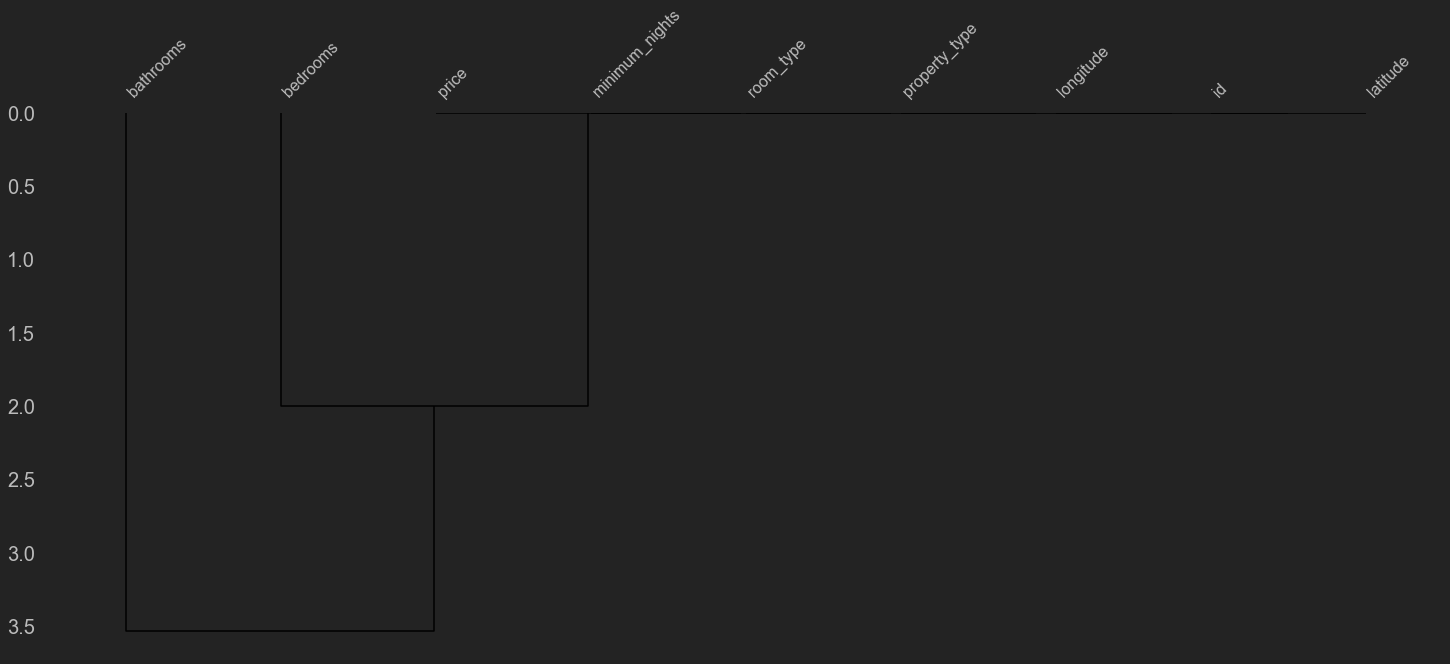

In [7]:
# check for pattern of missing number
missingno.dendrogram(df)

Those can be dropped as the data loss is not significant.

In [8]:
# dropping
df.dropna(inplace=True)
# check df 
df.isna().sum()

id                0
latitude          0
longitude         0
property_type     0
room_type         0
bathrooms         0
bedrooms          0
minimum_nights    0
price             0
dtype: int64

In [9]:
df.dtypes

id                  int64
latitude          float64
longitude         float64
property_type      object
room_type          object
bathrooms         float64
bedrooms          float64
minimum_nights      int64
price              object
dtype: object

Observation 

- cleaning of 'price' is needed.
- unique identifier can be dropped.

### cleaning `price`

In [10]:
df['price'] = df['price'].apply(lambda x: float(re.sub(r'\,|\$', '', x)))

In [11]:
df.drop(columns=['id'], inplace=True)

## zipcode

I used a nifty package to get zipcodes from latitude and longitude. 

In [12]:
from uszipcode import Zipcode, SearchEngine
search = SearchEngine(simple_zipcode=True)
zipcode_list = []
for cor in zip(df.latitude, df.longitude):
    result = search.by_coordinates(cor[0], cor[1],returns=1)
    zipcode_list.append(result[0].zipcode)
df['zipcode'] = zipcode_list

In [13]:
df['zipcode'] = df['zipcode'].astype('str')
df

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price,zipcode
0,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,170.0,94117
1,37.75402,-122.45805,House,Private room,1.0,1.0,1,99.0,94131
2,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,235.0,94110
3,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,65.0,94117
4,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,65.0,94114
...,...,...,...,...,...,...,...,...,...
8106,37.74010,-122.41196,House,Private room,2.0,3.0,30,699.0,94110
8107,37.77799,-122.42159,Condominium,Entire home/apt,1.0,1.0,1,200.0,94102
8108,37.73410,-122.38917,Hut,Private room,2.0,1.0,30,69.0,94124
8109,37.78144,-122.41207,Apartment,Entire home/apt,1.0,1.0,30,187.0,94103


## statistics for inspection

In [14]:
describe_dataframe(df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtype,nulls
latitude,8095.0,,,,37.77,0.02,37.7,37.75,37.77,37.79,37.83,float64,0
longitude,8095.0,,,,-122.43,0.03,-122.51,-122.44,-122.42,-122.41,-122.37,float64,0
property_type,8095.0,26,Apartment,3234,,,,,,,,object,0
room_type,8095.0,4,Entire home/apt,4767,,,,,,,,object,0
bathrooms,8095.0,,,,1.4,0.92,0.0,1.0,1.0,1.5,14.0,float64,0
bedrooms,8095.0,,,,1.35,0.93,0.0,1.0,1.0,2.0,14.0,float64,0
minimum_nights,8095.0,,,,12369.63,1111454.02,1.0,2.0,4.0,30.0,100000000.0,int64,0
price,8095.0,,,,225.65,412.58,0.0,100.0,150.0,240.0,10000.0,float64,0
zipcode,8095.0,26,94110,1150,,,,,,,,object,0


## Visualize on map

### Average price by zipcodes

In [21]:
def average_price_by_zipcode_interactive(df, mapbox_style="stamen-toner"):
    """Return a map with box based on zipcode for average house prices.
    
    Parameters:
    ===========
    mapbox_style = str; options are following:
        > "white-bg" yields an empty white canvas which results in no external HTTP requests

        > "carto-positron", "carto-darkmatter", "stamen-terrain",
          "stamen-toner" or "stamen-watercolor" yield maps composed of raster tiles 
          from various public tile servers which do not require signups or access tokens

        > "open-street-map" does work
    _________________________________________________________________________
    Uses geodata from:
    https://github.com/OpenDataDE/State-zip-code-GeoJSON/blob/master/ca_california_zip_codes_geo.min.json
    """
    zipcode_data = json.load(
        open('./data/ca_california_zip_codes_geo.min.json', 'r'))
    # extract zipcode for id matching
    for feature in zipcode_data['features']:
        feature['id'] = feature['properties']['ZCTA5CE10']

    fig = px.choropleth_mapbox(
        data_frame=df,
        locations='zipcode',
        geojson=zipcode_data,
        color='price',
        mapbox_style=mapbox_style,
        zoom=10,
        height=700,
        color_continuous_scale=['green', 'blue', 'red', 'gold'],
        title='Zipcode by Average Price',
        labels={'price': 'Average Price'},
        opacity=.7,
        center={
            'lat': df.latitude.mode()[0],
            'lon': df.longitude.mode()[0]
        })
    fig.update_geos(fitbounds='locations', visible=True)
    fig.update_layout(margin={"r": 0, "l": 0, "b": 0})
    fig.show()
    pass

In [2]:
average_price_by_zipcode_interactive(
    df.groupby(by='zipcode').mean().reset_index())

### Location in map

In [17]:
def get_location_interactive(df, mapbox_style="open-street-map"):
    """Return a map with markers for houses based on lat and long.
    
    Parameters:
    ===========
    mapbox_style = str; options are following:
        > "white-bg" yields an empty white canvas which results in no external HTTP requests

        > "carto-positron", "carto-darkmatter", "stamen-terrain",
          "stamen-toner" or "stamen-watercolor" yield maps composed of raster tiles 
          from various public tile servers which do not require signups or access tokens

        > "open-street-map" does work 'latitude', 'longitude'
    """
    fig = px.scatter_mapbox(
        df,
        lat=df.latitude,
        lon=df.longitude,
        color='price',
        color_continuous_scale=["green", 'blue', 'red', 'gold'],
        zoom=11.5,
        range_color=[0, df['price'].quantile(0.95)], # to negate outliers
        height=700,
        title='House location',
        opacity=.5,
        center={
            'lat': df.latitude.mode()[0],
            'lon': df.longitude.mode()[0]
        })
    fig.update_layout(mapbox_style=mapbox_style)
    fig.update_layout(margin={"r": 0, "l": 0, "b": 0})
    fig.show()
    pass

In [1]:
get_location_interactive(df)

for a static output use this instead of showing the object. You can also save this as image by tinkering the output type.

```python
import plotly.io as plyIo
img_bytes = fig.to_image(format="png", width=1200, height=700, scale=1)
from IPython.display import Image
display(Image(img_bytes))
```

# Further analysis 
This is a part of a analysis of rental price prediction. Which can be found [here](https://github.com/tamjid-ahsan/House-rental-price-prediction).